In this notebook we explore the correlation of the predictor variables with the target variable and also check for multicollinearity

In [1]:
##Importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
##Loading the dataset
df_train = pd.read_csv("../../data/train_set.csv")

#Pre-processing
df_train = df_train.drop(columns=['DoctorInCharge'])


### **Checking for Correlation between Features**

In [6]:
#Extracting Numerical Features
excluded_columns = ['PatientID', 'Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
                    'FamilyHistoryAlzheimers', 'CardiovascularDisease','Diabetes', 'Depression', 
                    'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 
                    'Confusion', 'Disorientation', 'PersonalityChanges', 
                    'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']

columns_to_check = [col for col in df_train.columns if col not in excluded_columns]

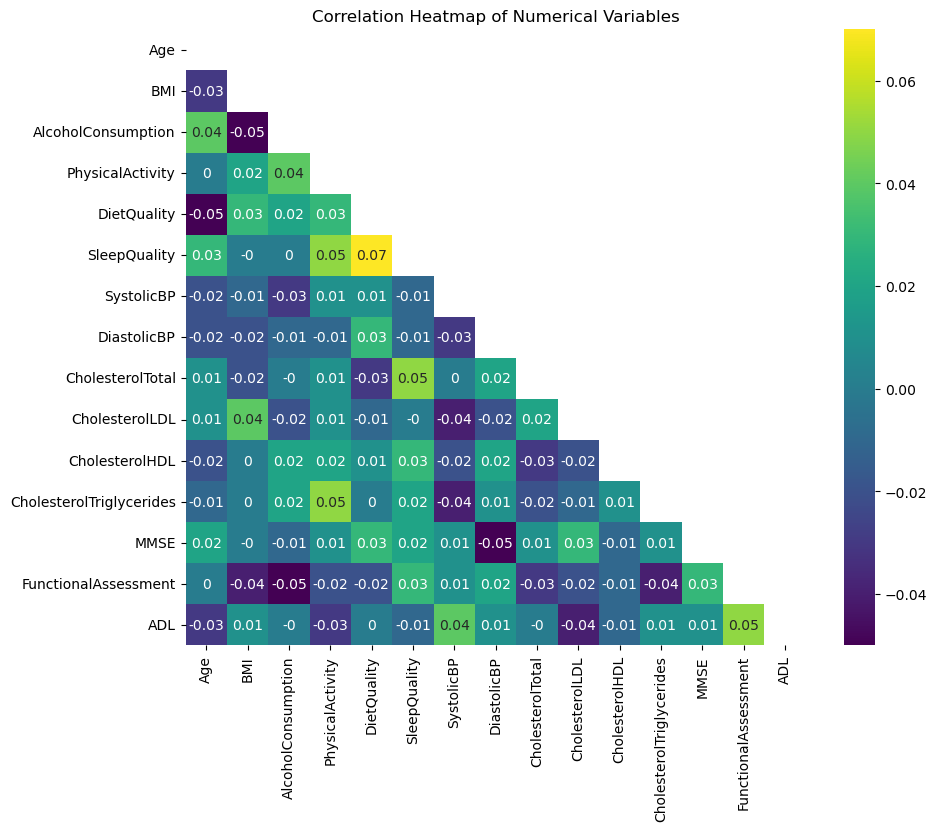

In [7]:
# Correlations among numerical variables
numerical_var_corr = df_train[columns_to_check].corr().round(2)
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(numerical_var_corr, dtype=bool))
sns.heatmap(numerical_var_corr, annot=True, cmap='viridis', mask=mask)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

**Conclusion: No significant correlation among the numerical variables.**

### **Checking Correlation between features and Target Variable**

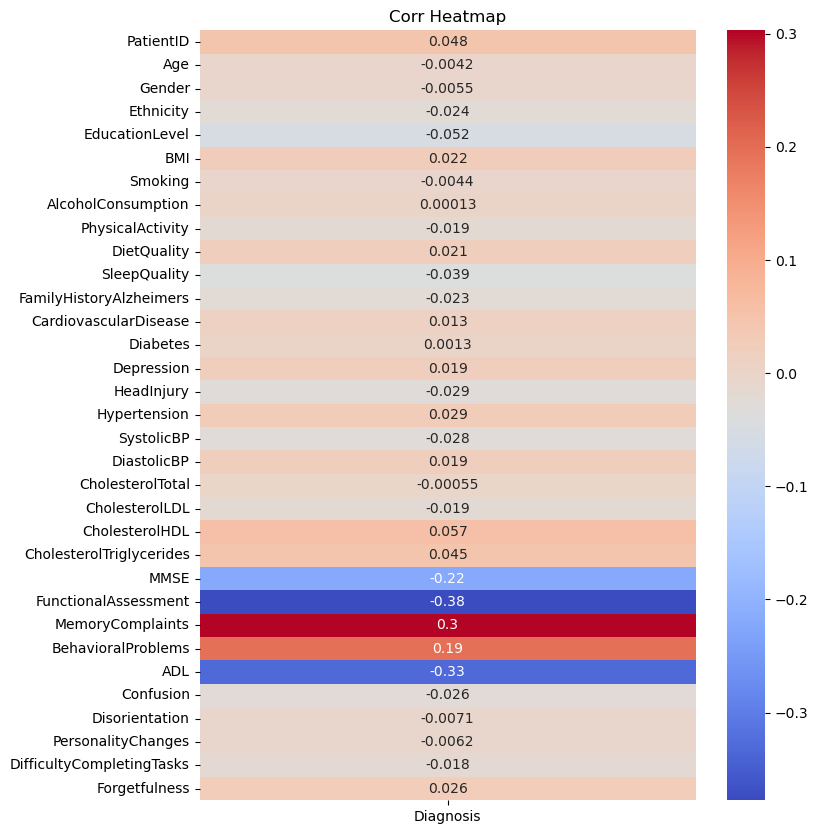

In [15]:
##Correlation Heatmap
corr_with_diagnosis = df_train.corr()['Diagnosis'].drop('Diagnosis').to_frame()
fig = plt.figure(figsize=(8,10))
sns.heatmap(corr_with_diagnosis , annot=True, cmap='coolwarm' , cbar=True)
plt.title('Corr Heatmap')
plt.show()

**Note:** The correlation between `Diagnosis` and Cognitive and Functional Assessment features is significantly more than other subcategories.

#### **Conclusion**

- There is no severe case of multicollinearity
- The cognitive features are the only features with a strong correlation with the target variable. 